In [29]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [30]:
fobs = "/short/w35/mm3972/data/Eucface_data/swc_at_depth/FACE_P0018_RA_NEUTRON_20120430-20190510_L1.csv"

In [52]:
neo = pd.read_csv(fobs, usecols = ['Ring','Depth','Date','VWC','Bulk.den','GWC'])
neo['Soil.den'] = (100-neo['GWC'].values)/(100-neo['VWC'].values)*neo['Bulk.den'].values
soil_den = neo.groupby(by=['Depth']).mean()['Soil.den']

In [58]:
grid_x = [1,4.5,10.,19.5,41,71,101,131,161,191,221,273.5,386] # 13 soil layers in CABLE
#Soil_den = np.interp(grid_x, soil_den.index, soil_den.values)
f = interp1d(soil_den.index, soil_den.values, kind = 'cubic', \
             fill_value=(1.654962,1.938769), bounds_error=False) # fill_value='extrapolate'
Soil_den = f(grid_x)

array([1.654962  , 1.654962  , 1.654962  , 1.654962  , 1.7775808 ,
       1.95294352, 1.9697477 , 1.82519628, 2.07583018, 1.98412624,
       1.92855192, 1.82159631, 1.8562751 ])

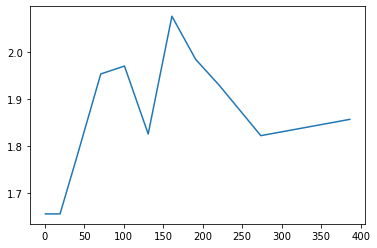

In [59]:
plt.plot(grid_x,Soil_den)

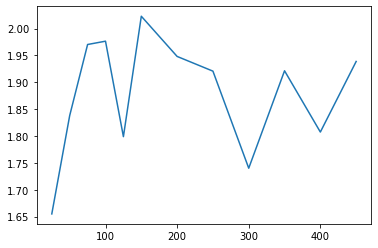

In [60]:
plt.plot(soil_den)

对比neo、amb和ele的土壤密度，如果差异不大就都用neo的 -- 差异不是特别大，所以用ring1-6 & outside的所有观测来计算土壤密度
1. 计算土壤密度
2. 求neo amb ele 在每个深度上的土壤密度
3. 从obs深度插值到cable深度